## Predicting Ad Lift with a Neural Network  
    - Thanks to: Professor Nicholas Brown @ Northeastern University, Dec.05.2019
- The effectiveness of an ad is usually measured through a metric called "lift": As different digital properties have different measures of effectiveness such as views, clicks, likes, shares, etc. and these measures are combined into a single metric, lift, which can be used to estimate the increase in sales over no advertising.  


### What will we do? 
   - We use historical lift data to predict the lift that occured in the past.  
   - The idea is to create a function that can predict known data well under that assumption it well continue tp predict accurately with new unkown data.  
    
    
### What will we use?  
  - __Artificial neural networks(ANNs):__ based on a collection of connected units called artificial neurons. 
    - Multiclass perceptron (MLP) to predict lift.
    - 2 Stages of ANNs: Backpropagation + Weight update  
    - A neural network can fit data like this simulated lift data, unlike linear regression, and unlike the ARIMA, it can take any number of input varibles called independent variables.  
    
    
  - __Autoregressive integrated moving average (ARIMA)__:  
    - fit to time series data;  
    - Either: better understand the data
    - Or predict future points in the series (forecasting).  
    __Cases__:  
      - Where data show evidence of non-stationarity
      - where an initial differencing step (corresponding to the "integrated" part of the model) can be applied to reduce the non-stationarity.  
  - __TensorFlow__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import warnings
random.seed(5)
warnings.filterwarnings('ignore')
%matplotlib inline

### Load Lift Data

In [3]:
df = pd.read_csv("data/Ad_Lift_Channels.csv",na_values=['null'],index_col='timestamp',parse_dates=True,infer_datetime_format=True)
df.head(5)

,lift_A,volume_A,lift_B,volume_B,lift_C,volume_C,lift_D,volume_D
timestamp,,,,,,,,
2019-06-01 00:00:00,0.547229,10718,0.619303,15135,0.573706,37275,0.710544,11360
2019-06-01 04:00:00,0.552555,3518,0.623160,61385,0.576369,6416,0.711987,27814
2019-06-01 08:00:00,0.551968,4397,0.623200,8916,0.576147,2153,0.712020,2063
2019-06-01 12:00:00,0.557204,2898,0.627480,4721,0.578694,1190,0.713716,983
2019-06-01 16:00:00,0.552555,9095,0.623170,30948,0.576369,1413,0.711982,6059


In [5]:
# copy the data until you are sure of an analysis.
df_ma = df
df_ma.head(5)

,lift_A,volume_A,lift_B,volume_B,lift_C,volume_C,lift_D,volume_D
timestamp,,,,,,,,
2019-06-01 00:00:00,0.547229,10718,0.619303,15135,0.573706,37275,0.710544,11360
2019-06-01 04:00:00,0.552555,3518,0.623160,61385,0.576369,6416,0.711987,27814
2019-06-01 08:00:00,0.551968,4397,0.623200,8916,0.576147,2153,0.712020,2063
2019-06-01 12:00:00,0.557204,2898,0.627480,4721,0.578694,1190,0.713716,983
2019-06-01 16:00:00,0.552555,9095,0.623170,30948,0.576369,1413,0.711982,6059


In [14]:
df_ma.shape

(1126, 8)

In [6]:
df_ma.tail(5)

,lift_A,volume_A,lift_B,volume_B,lift_C,volume_C,lift_D,volume_D
timestamp,,,,,,,,
2019-12-04 19:59:00,0.896005,800,0.801618,6451,0.849462,100,0.797281,1300
2019-12-04 23:59:00,0.890745,711,0.799442,18315,0.844812,4493,0.795799,8700
2019-12-05 03:59:00,0.891895,37425,0.798104,6721,0.847387,1421,0.795254,5855
2019-12-05 07:59:00,0.893032,435,0.800419,5000,0.847956,2100,0.796695,27417
2019-12-05 11:59:00,0.894529,463,0.797504,6555,0.798704,506,0.777827,1515


In [9]:
# df.iloc[[0]], df.iloc[[0, 1]], df.iloc[:3]: With a list of integers.
df_ma.iloc[:,[0,2,4,6]] # We need the lift_A-D by every 2 columns.

,lift_A,lift_B,lift_C,lift_D
timestamp,,,,
2019-06-01 00:00:00,0.547229,0.619303,0.573706,0.710544
2019-06-01 04:00:00,0.552555,0.623160,0.576369,0.711987
2019-06-01 08:00:00,0.551968,0.623200,0.576147,0.712020
2019-06-01 12:00:00,0.557204,0.627480,0.578694,0.713716
2019-06-01 16:00:00,0.552555,0.623170,0.576369,0.711982
...,...,...,...,...
2019-12-04 19:59:00,0.896005,0.801618,0.849462,0.797281
2019-12-04 23:59:00,0.890745,0.799442,0.844812,0.795799
2019-12-05 03:59:00,0.891895,0.798104,0.847387,0.795254


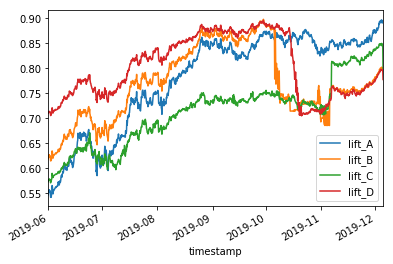

In [15]:
# Plot the df_ma.iloc[:,[0,2,4,6]]:
df_ma.iloc[:,[0,2,4,6]].plot()

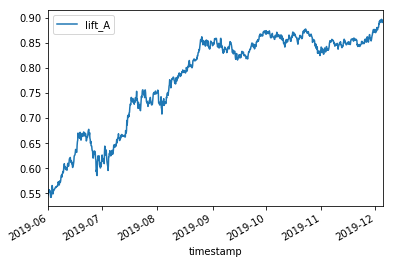

In [16]:
# Just focus on lift_A:
df_ma.loc[:,['lift_A']].plot()

In [19]:
# Extract some Naive & Simple Averaging features
df_ma['volume_A_Momentum'] = df_ma['volume_A'].shift(1).rolling(window = 2).mean() - df_ma['volume_A'].shift(1).rolling(window = 5).mean()
df_ma['lift_A_Momentum'] = df_ma['lift_A'].shift(1).rolling(window = 2).mean() - df_ma['lift_A'].shift(1).rolling(window = 5).mean()
df_ma['3step_MA_lift_A'] = df_ma['lift_A'].shift(1).rolling(window = 3).mean()
df_ma['7step_MA_lift_A'] = df_ma['lift_A'].shift(1).rolling(window = 7).mean()
df_ma['15step_MA_lift_A'] = df_ma['lift_A'].shift(1).rolling(window = 15).mean()
df_ma['Std_Dev_lift_A']= df_ma['lift_A'].rolling(15).std()
df_ma['volume_B_Momentum'] = df_ma['volume_B'].shift(1).rolling(window = 2).mean() - df_ma['volume_B'].shift(1).rolling(window = 5).mean()
df_ma['lift_B_Momentum'] = df_ma['lift_B'].shift(1).rolling(window = 2).mean() - df_ma['lift_B'].shift(1).rolling(window = 5).mean()
df_ma['3step_MA_lift_B'] = df_ma['lift_B'].shift(1).rolling(window = 3).mean()
df_ma['7step_MA_lift_B'] = df_ma['lift_B'].shift(1).rolling(window = 7).mean()
df_ma['15step_MA_lift_B'] = df_ma['lift_B'].shift(1).rolling(window = 15).mean()
df_ma['Std_Dev_lift_B']= df_ma['lift_B'].rolling(15).std()
df_ma['volume_C_Momentum'] = df_ma['volume_C'].shift(1).rolling(window = 2).mean() - df_ma['volume_C'].shift(1).rolling(window = 5).mean()
df_ma['lift_C_Momentum'] = df_ma['lift_C'].shift(1).rolling(window = 2).mean() - df_ma['lift_C'].shift(1).rolling(window = 5).mean()
df_ma['3step_MA_lift_C'] = df_ma['lift_C'].shift(1).rolling(window = 3).mean()
df_ma['7step_MA_lift_C'] = df_ma['lift_C'].shift(1).rolling(window = 7).mean()
df_ma['15step_MA_lift_C'] = df_ma['lift_C'].shift(1).rolling(window = 15).mean()
df_ma['Std_Dev_lift_C']= df_ma['lift_C'].rolling(15).std()
df_ma['volume_D_Momentum'] = df_ma['volume_D'].shift(1).rolling(window = 2).mean() - df_ma['volume_D'].shift(1).rolling(window = 5).mean()
df_ma['lift_D_Momentum'] = df_ma['lift_D'].shift(1).rolling(window = 2).mean() - df_ma['lift_D'].shift(1).rolling(window = 5).mean()
df_ma['3step_MA_lift_D'] = df_ma['lift_D'].shift(1).rolling(window = 3).mean()
df_ma['7step_MA_lift_D'] = df_ma['lift_D'].shift(1).rolling(window = 7).mean()
df_ma['15step_MA_lift_D'] = df_ma['lift_D'].shift(1).rolling(window = 15).mean()
df_ma['Std_Dev_lift_D']= df_ma['lift_D'].rolling(15).std()

In [20]:
# Check the size
print(df_ma.shape)
df_ma.head()

(1126, 32)


,lift_A,volume_A,lift_B,volume_B,lift_C,volume_C,lift_D,volume_D,volume_A_Momentum,lift_A_Momentum,...,3step_MA_lift_C,7step_MA_lift_C,15step_MA_lift_C,Std_Dev_lift_C,volume_D_Momentum,lift_D_Momentum,3step_MA_lift_D,7step_MA_lift_D,15step_MA_lift_D,Std_Dev_lift_D
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-06-01 00:00:00,0.547229,10718,0.619303,15135,0.573706,37275,0.710544,11360,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-01 04:00:00,0.552555,3518,0.623160,61385,0.576369,6416,0.711987,27814,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-01 08:00:00,0.551968,4397,0.623200,8916,0.576147,2153,0.712020,2063,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-01 12:00:00,0.557204,2898,0.627480,4721,0.578694,1190,0.713716,983,NaN,NaN,...,0.575407,NaN,NaN,NaN,NaN,NaN,0.711517,NaN,NaN,NaN
2019-06-01 16:00:00,0.552555,9095,0.623170,30948,0.576369,1413,0.711982,6059,NaN,NaN,...,0.577070,NaN,NaN,NaN,NaN,NaN,0.712575,NaN,NaN,NaN


### The moving average created NaNs
- Note that we can't create a 15-step moving average until we have 15 time steps. The simplest way to deal with this is to drop the first 15 rows of transformed data.

In [21]:
df_ma.tail()

,lift_A,volume_A,lift_B,volume_B,lift_C,volume_C,lift_D,volume_D,volume_A_Momentum,lift_A_Momentum,...,3step_MA_lift_C,7step_MA_lift_C,15step_MA_lift_C,Std_Dev_lift_C,volume_D_Momentum,lift_D_Momentum,3step_MA_lift_D,7step_MA_lift_D,15step_MA_lift_D,Std_Dev_lift_D
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-12-04 19:59:00,0.896005,800,0.801618,6451,0.849462,100,0.797281,1300,460.6,0.000400,...,0.848237,0.847987,0.845714,0.003098,1907.9,-0.000371,0.797158,0.795856,0.792233,0.004026
2019-12-04 23:59:00,0.890745,711,0.799442,18315,0.844812,4493,0.795799,8700,410.8,0.001813,...,0.849136,0.848393,0.846304,0.002748,2354.4,0.000097,0.796877,0.796524,0.793061,0.003453
2019-12-05 03:59:00,0.891895,37425,0.798104,6721,0.847387,1421,0.795254,5855,-55.9,-0.000532,...,0.848088,0.848025,0.846569,0.002375,1286.4,-0.000371,0.796740,0.796901,0.793761,0.003165
2019-12-05 07:59:00,0.893032,435,0.800419,5000,0.847956,2100,0.796695,27417,10876.8,-0.002435,...,0.847221,0.847898,0.846958,0.001981,2505.9,-0.000810,0.796111,0.796659,0.794201,0.002870
2019-12-05 11:59:00,0.894529,463,0.797504,6555,0.798704,506,0.777827,1515,10775.8,-0.001291,...,0.846718,0.847761,0.847343,0.012728,6502.4,-0.000459,0.795916,0.796643,0.794714,0.005021


## Drop all NaN 

In [22]:
# Drop early rows
df_ma = df_ma.dropna()
df_ma.shape

(1111, 32)

In [23]:
df_ma.head()

,lift_A,volume_A,lift_B,volume_B,lift_C,volume_C,lift_D,volume_D,volume_A_Momentum,lift_A_Momentum,...,3step_MA_lift_C,7step_MA_lift_C,15step_MA_lift_C,Std_Dev_lift_C,volume_D_Momentum,lift_D_Momentum,3step_MA_lift_D,7step_MA_lift_D,15step_MA_lift_D,Std_Dev_lift_D
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-06-03 12:00:00,0.556049,1400,0.626393,10729,0.585330,806,0.715347,4100,-1127.2,0.009610,...,0.585098,0.579331,0.577820,0.004834,8377.9,0.005613,0.717666,0.711996,0.712082,0.004028
2019-06-03 16:00:00,0.549015,1100,0.620525,2701,0.581742,691,0.710635,1171,-1880.8,0.002171,...,0.586845,0.581358,0.578595,0.004856,-5770.6,0.001108,0.718297,0.713378,0.712402,0.004053
2019-06-03 20:00:00,0.557204,1922,0.626835,5913,0.585836,126,0.715635,100,-3357.2,-0.004774,...,0.584063,0.582254,0.578953,0.005095,-5549.3,-0.002805,0.714764,0.713825,0.712312,0.004141
2019-06-04 00:00:00,0.554889,600,0.624898,3240,0.584679,1166,0.713670,114,-1219.4,-0.005067,...,0.584303,0.583767,0.579599,0.005251,-6688.9,-0.003097,0.713872,0.714982,0.712553,0.004140
2019-06-04 04:00:00,0.557204,12694,0.626794,3015,0.585836,1749,0.714360,1410,-989.4,0.000034,...,0.584086,0.584697,0.579998,0.005352,-1050.0,-0.000067,0.713313,0.715469,0.712550,0.004163


In [24]:
# Let's save the transformed data for the other analysis
df_ma.to_csv("data/Ad_Lift_Channels_MA.csv")

## Deep Learning Model

In [26]:
df_ma.columns

Index(['lift_A', 'volume_A', 'lift_B', 'volume_B', 'lift_C', 'volume_C',
       'lift_D', 'volume_D', 'volume_A_Momentum', 'lift_A_Momentum',
       '3step_MA_lift_A', '7step_MA_lift_A', '15step_MA_lift_A',
       'Std_Dev_lift_A', 'volume_B_Momentum', 'lift_B_Momentum',
       '3step_MA_lift_B', '7step_MA_lift_B', '15step_MA_lift_B',
       'Std_Dev_lift_B', 'volume_C_Momentum', 'lift_C_Momentum',
       '3step_MA_lift_C', '7step_MA_lift_C', '15step_MA_lift_C',
       'Std_Dev_lift_C', 'volume_D_Momentum', 'lift_D_Momentum',
       '3step_MA_lift_D', '7step_MA_lift_D', '15step_MA_lift_D',
       'Std_Dev_lift_D'],
      dtype='object')

In [27]:
# Specifiy our features and target 
X=['volume_A','volume_A_Momentum','lift_A_Momentum','3step_MA_lift_A','7step_MA_lift_A','15step_MA_lift_A','Std_Dev_lift_A'] 
y ='lift_A'
print(X)
print(y)

['volume_A', 'volume_A_Momentum', 'lift_A_Momentum', '3step_MA_lift_A', '7step_MA_lift_A', '15step_MA_lift_A', 'Std_Dev_lift_A']
lift_A


In [41]:
# Subset out data for only the desired features
X = df_ma.loc[:,X] # .loc[] is primarily label based. df.loc[:, X], means all rows
y = df_ma.iloc[:,0] #.iloc[] column 0, all rows

In [42]:
X.head()

,volume_A,volume_A_Momentum,lift_A_Momentum,3step_MA_lift_A,7step_MA_lift_A,15step_MA_lift_A,Std_Dev_lift_A
timestamp,,,,,,,
2019-06-03 12:00:00,1400,-1127.2,0.009610,0.560489,0.551317,0.552086,0.006674
2019-06-03 16:00:00,1100,-1880.8,0.002171,0.561556,0.553309,0.552674,0.006741
2019-06-03 20:00:00,1922,-3357.2,-0.004774,0.555990,0.554080,0.552438,0.006850
2019-06-04 00:00:00,600,-1219.4,-0.005067,0.554090,0.556107,0.552787,0.006769
2019-06-04 04:00:00,12694,-989.4,0.000034,0.553703,0.556946,0.552633,0.006871


In [43]:
y.head()

timestamp
2019-06-03 12:00:00    0.556049
2019-06-03 16:00:00    0.549015
2019-06-03 20:00:00    0.557204
2019-06-04 00:00:00    0.554889
2019-06-04 04:00:00    0.557204
Name: lift_A, dtype: float64

## Split dataset 

In [45]:
split = int(len(df_ma)*0.8)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

### Feature scaling- normalize the data set

- average all input features to 0 and convert their variance to 1.

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Build the Simple MLP

__Sequential model__: 
- The Sequential model is a linear stack of layers.   
- Sequential model API: you first create an empty model object, and then you add layers to it one after another in sequence.

In [49]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [50]:
DLmodel = Sequential() 

In [51]:
#Input Layer:
DLmodel.add(
    Dense(
        units = 128,  # It defines the number of nodes or neurons in a layer.
        kernel_initializer = 'uniform',
        activation = 'relu',
        input_dim = X.shape[1])) # The number of inputs to the hidden layer: X.columns

Instructions for updating:
Colocations handled automatically by placer.


- Hidden Layer:

In [52]:
DLmodel.add(
    Dense(
        units = 64,
        kernel_initializer = 'uniform',
        activation = 'relu'))

In [56]:
DLmodel.add(
    Dense(
        units = 64,
        kernel_initializer = 'uniform',
        activation = 'relu'))

- Output Layer:

In [57]:
DLmodel.add(
    Dense(
        units = 1, 
        kernel_initializer = 'uniform',
        activation = 'relu'))

- Add an output layer

In [59]:
DLmodel.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

## Train the network

In [60]:
DLmodel.fit(X_train, y_train, batch_size = 11, epochs = 55)

Instructions for updating:
Use tf.cast instead.
Epoch 1/55
888/888 [==============================] - 0s 465us/step - loss: 0.1809 - accuracy: 0.0000e+00
Epoch 2/55
888/888 [==============================] - 0s 117us/step - loss: 0.0165 - accuracy: 0.0000e+00
Epoch 3/55
888/888 [==============================] - 0s 141us/step - loss: 0.0056 - accuracy: 0.0000e+00
Epoch 4/55
888/888 [==============================] - 0s 151us/step - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 5/55
888/888 [==============================] - 0s 168us/step - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 6/55
888/888 [==============================] - 0s 165us/step - loss: 6.1085e-04 - accuracy: 0.0000e+00
Epoch 7/55
888/888 [==============================] - 0s 150us/step - loss: 2.5363e-04 - accuracy: 0.0000e+00
Epoch 8/55
888/888 [==============================] - 0s 158us/step - loss: 2.4985e-04 - accuracy: 0.0000e+00
Epoch 9/55
888/888 [==============================] - 0s 189us/step - loss: 9.3503e-05 - acc

## Make Prediction

In [61]:
# Generate some predictions from our test data
y_pred = DLmodel.predict(X_test)
(y_pred,y_test.tolist())

(array([[0.85836846],
        [0.8586017 ],
        [0.85792744],
        [0.85424685],
        [0.8518923 ],
        [0.8477585 ],
        [0.8505193 ],
        [0.85001355],
        [0.84953946],
        [0.84900993],
        [0.84799546],
        [0.8458788 ],
        [0.8443325 ],
        [0.8445454 ],
        [0.84355813],
        [0.84905857],
        [0.8514485 ],
        [0.853057  ],
        [0.8517334 ],
        [0.8508943 ],
        [0.85338604],
        [0.85289234],
        [0.85019475],
        [0.8486511 ],
        [0.8470757 ],
        [0.84804267],
        [0.84205264],
        [0.8463276 ],
        [0.85265774],
        [0.8531135 ],
        [0.8503024 ],
        [0.84894186],
        [0.8455921 ],
        [0.83596987],
        [0.859033  ],
        [0.85851026],
        [0.8476108 ],
        [0.8494157 ],
        [0.85157156],
        [0.85428244],
        [0.8537959 ],
        [0.85402626],
        [0.85502356],
        [0.8559647 ],
        [0.85797805],
        [0

## Calculate the accuracy

In [62]:
from sklearn import metrics
accuracy=np.sqrt(metrics.mean_squared_error(y_test.tolist(), y_pred))
print(accuracy)

0.019985126601191748


## Create a Null Model

- Another way to predict the value of lift is just the take the average value of lift and use this as a prediction. This gives one a base model for comparison.  
- If one can get as good or better prediction from taking the mean value than with an MLP than the MLP isn't very useful.

In [63]:
y_train_mean=np.mean(y_train.tolist())
print(y_train_mean)

0.7633679941463964


In [64]:
y_null = np.zeros_like(y_test.tolist(), dtype=float)
y_null.fill(y_train_mean)
y_null[0:5]  #??????????????????????????????????????Why 0:5?

array([0.76336799, 0.76336799, 0.76336799, 0.76336799, 0.76336799])

In [65]:
null_accuracy=np.sqrt(metrics.mean_squared_error(y_test.tolist(),y_null))
print(null_accuracy)

0.09152029031531646


## Visualize the difference

Null model: RSME of around 0.092;  
MLP gives an RSME of around 0.017 (so it seems much better than the null model.)

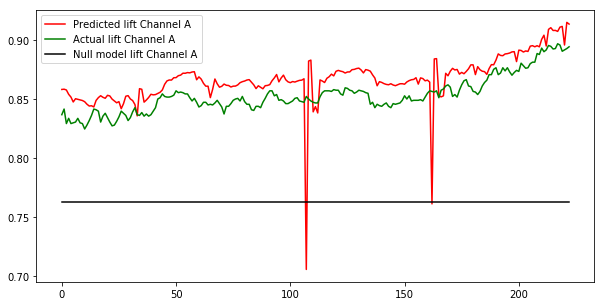

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_pred, color='r', label='Predicted lift Channel A')
plt.plot(y_test.tolist(), color='g', label='Actual lift Channel A')
plt.plot(y_null, color='k', label='Null model lift Channel A')

plt.legend()
plt.show()

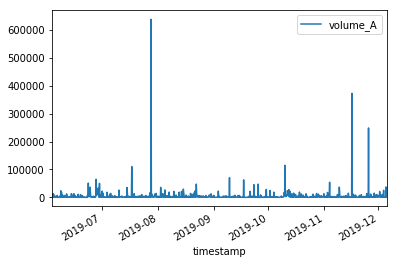

In [67]:
df_ma.iloc[:,[1]].plot()

## Weird spikes?

Get rid of spikes and further improve our model.   
The volume feature also has some large spikes. Is it possible that including extra features is actually hurting our model. 
- In machine learning, models that we will discuss in the second notebook will automatically downweight the importance of features and weight poorly predictive features to close to zero.   
    #?????????????????????????? Regularization??  

MLPs don't do this so let's remove the volume features as predictors and see if that helps?


### Rerun model without volume features

In [68]:
X=['lift_A_Momentum','3step_MA_lift_A','7step_MA_lift_A','15step_MA_lift_A','Std_Dev_lift_A']
X = df_ma.loc[:,X]
X.head()

,lift_A_Momentum,3step_MA_lift_A,7step_MA_lift_A,15step_MA_lift_A,Std_Dev_lift_A
timestamp,,,,,
2019-06-03 12:00:00,0.009610,0.560489,0.551317,0.552086,0.006674
2019-06-03 16:00:00,0.002171,0.561556,0.553309,0.552674,0.006741
2019-06-03 20:00:00,-0.004774,0.555990,0.554080,0.552438,0.006850
2019-06-04 00:00:00,-0.005067,0.554090,0.556107,0.552787,0.006769
2019-06-04 04:00:00,0.000034,0.553703,0.556946,0.552633,0.006871


In [69]:
X_train, X_test = X[:split], X[split:]
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [71]:
DLmodel2 = Sequential()
DLmodel2.add(
    Dense(
        units = 128, 
        kernel_initializer = 'uniform',
        activation = 'relu',
        input_dim = X.shape[1]))
DLmodel2.add(
    Dense(
        units = 64,
        kernel_initializer = 'uniform',
        activation = 'relu'))
DLmodel2.add(
    Dense(
        units = 64,
        kernel_initializer = 'uniform',
        activation = 'relu'))
DLmodel2.add(
    Dense(
        units = 1, 
        kernel_initializer = 'uniform',
        activation = 'relu'))

In [72]:
DLmodel2.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [73]:
DLmodel2.fit(X_train, y_train, batch_size = 11, epochs = 55)

Epoch 1/55
888/888 [==============================] - 1s 614us/step - loss: 0.1615 - accuracy: 0.0000e+00
Epoch 2/55
888/888 [==============================] - 0s 129us/step - loss: 0.0065 - accuracy: 0.0000e+00
Epoch 3/55
888/888 [==============================] - 0s 113us/step - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 4/55
888/888 [==============================] - 0s 127us/step - loss: 5.7818e-04 - accuracy: 0.0000e+00
Epoch 5/55
888/888 [==============================] - 0s 119us/step - loss: 2.6962e-04 - accuracy: 0.0000e+00
Epoch 6/55
888/888 [==============================] - 0s 164us/step - loss: 1.4587e-04 - accuracy: 0.0000e+00
Epoch 7/55
888/888 [==============================] - 0s 173us/step - loss: 9.7803e-05 - accuracy: 0.0000e+00
Epoch 8/55
888/888 [==============================] - 0s 127us/step - loss: 7.1237e-05 - accuracy: 0.0000e+00
Epoch 9/55
888/888 [==============================] - 0s 172us/step - loss: 5.6135e-05 - accuracy: 0.0000e+00
Epoch 10/55
888/888 [=

In [74]:
# Generate some predictions from our test data
y_pred = DLmodel2.predict(X_test)
(y_pred,y_test.tolist())
accuracy=np.sqrt(metrics.mean_squared_error(y_test.tolist(), y_pred))
print(accuracy)

0.012088673900694406


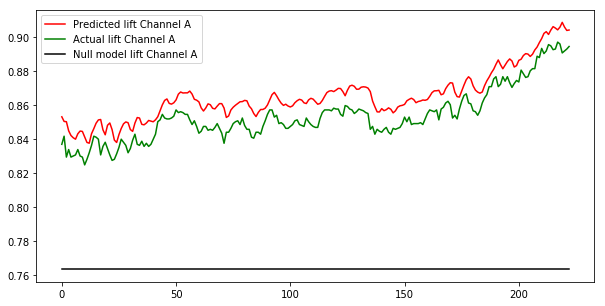

In [75]:
y_pred = DLmodel2.predict(X_test)
plt.figure(figsize=(10,5))
plt.plot(y_pred, color='r', label='Predicted lift Channel A')
plt.plot(y_test.tolist(), color='g', label='Actual lift Channel A')
plt.plot(y_null, color='k', label='Null model lift Channel A')
plt.legend()
plt.show()

### Ya! Removing a feature improved the model!  
- Removing a feature improved the model from a RSME of 0.017 to 0.010 and we can see the weird spikes are gone.